In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df= pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
x= df.drop('charges', axis= 1)
y= df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2, random_state= 42)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Input

In [ ]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'linear')
])

2025-11-26 04:55:12.955797: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
model.compile(
    loss = 'mse',
    metrics = ['mae'],
    optimizer = Adam()
)

In [ ]:
history = model.fit(
    x= x_train,
    y= y_train,
    epochs = 10000
)

In [ ]:
model.evaluate(x_test, y_test,verbose = 0)

[19656042.0, 2742.5888671875]

In [ ]:
prediction = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


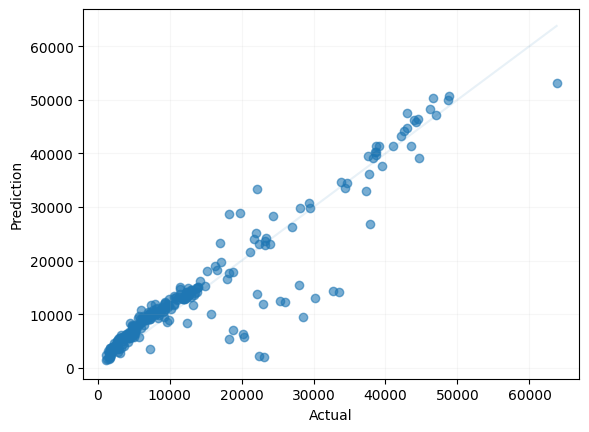

In [ ]:
plt.scatter(y_test, prediction,alpha = 0.6);
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(alpha = 0.1)
maxmum = max(max(y_test), max(prediction))
minmum = min(min(y_test), min(prediction))
plt.plot([maxmum,minmum], [maxmum,minmum], alpha = 0.1);